In [8]:

%load_ext autoreload
%autoreload 2

from sdk.ample import Ample
import sys
sys.path.insert(0,'/home/aw1223/ip/agile')
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam')
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam/neural_lam')

import torch
from sdk.models.graph_lam_data import GraphLAM_DataProcessor
from sdk.models.graph_lam import GraphLam_Model
from neural_lam.weather_dataset import WeatherDataset

%cd /home/aw1223/ip/worktree_a/imports/neural-lam

from torch_geometric.datasets import FakeDataset #TODO remove



dataset = FakeDataset(
                        num_graphs=1, 
                        num_nodes = 50,
                        avg_degree=1,
                        num_channels=32,
                        edge_dim=32
                    )[0]




grid_features = dataset.x
mesh_static_features = dataset.x

g2m_features = dataset.edge_attr
m2g_features = dataset.edge_attr


m2g_edge_index = dataset.edge_index
g2m_edge_index = dataset.edge_index

m2m_edge_index = dataset.edge_index
m2m_features = dataset.edge_attr
m2m_edge_index = dataset.edge_index

# print(graph_data)



graph_data = {
    'features': {
        'm2m_features': m2m_features,
        'mesh_static_features': mesh_static_features,
        'm2g_features': m2g_features,
        'g2m_features': g2m_features,
        'grid_features': grid_features
    },
    'edges': {
        'm2m_edge_index': m2m_edge_index,
        'm2g_edge_index': m2g_edge_index,
        'g2m_edge_index': g2m_edge_index
    },
    'shapes': {
        'm2m_features_shape': m2m_features.shape,
        'mesh_static_features_shape': mesh_static_features.shape,
        'm2g_features_shape': m2g_features.shape,
        'g2m_features_shape': g2m_features.shape,
        'grid_features_shape': grid_features.shape
    }
}

feature_shape_dict = graph_data['shapes']
edge_index_dict = graph_data['edges']

model = GraphLam_Model(feature_shape_dict,edge_index_dict)

grid_features = graph_data['features']['grid_features']
mesh_static_features = graph_data['features']['mesh_static_features']
g2m_features = graph_data['features']['g2m_features']
m2m_features = graph_data['features']['m2m_features']
m2g_features = graph_data['features']['m2g_features']




g2m_edge_index = graph_data['edges']['g2m_edge_index']
m2m_edge_index = graph_data['edges']['m2m_edge_index']
m2g_edge_index = graph_data['edges']['m2g_edge_index']

inputs = [g2m_features,g2m_edge_index,grid_features,m2g_features,m2g_edge_index,m2m_features,mesh_static_features,m2m_edge_index]

out = model(*inputs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/aw1223/ip/worktree_a/imports/neural-lam
Edges in subgraphs: m2m=2162, g2m=2162, m2g=2162
Loaded graph with 2164 nodes (1082 grid, 1082 mesh)
x torch.Size([2164, 32])
edge_index torch.Size([2, 2162])
rx_node_embed torch.Size([2164, 32])
rx_aggregated_edges torch.Size([1082, 32])
forward m2m_gnn
x torch.Size([2164, 32])
edge_index torch.Size([2, 2162])
rx_node_embed torch.Size([2164, 32])
rx_aggregated_edges torch.Size([1082, 32])
forward m2g_gnn
x torch.Size([3246, 32])
edge_index torch.Size([2, 2162])
rx_node_embed torch.Size([3246, 32])
rx_aggregated_edges torch.Size([1082, 32])


Moving model to Ample
Compiling model
model name GraphLam_Model
x torch.Size([2164, 32])
edge_index torch.Size([2, 2162])
rx_node_embed torch.Size([2164, 32])
rx_aggregated_edges torch.Size([1082, 32])
forward m2m_gnn
x torch.Size([2164, 32])
edge_index torch.Size([2, 2162])
rx_node_embed torch.Size([2164, 32])
rx_aggregated_edges torch.Size([1082, 32])
forward m2g_gnn
x torch.Size([3246, 32])
edge_index torch.Size([2, 2162])
rx_node_embed torch.Size([3246, 32])
rx_aggregated_edges torch.Size([1082, 32])
input_to_layer_map {('grid_embedder_input_0', 0): 'mesh_embedder', ('g2m_embedder_input_0', 0): 'm2m_embedder', ('grid_embedder_output_0', 0): 'encoding_grid_mlp', ('g2m_gnn_input_1', 1): 'm2g_gnn', ('g2m_embedder_output_0', 2): 'g2m_gnn', ('mesh_embedder_output_0', 3): 'g2m_gnn', ('g2m_gnn_output_0', 0): 'processor', ('m2m_embedder_output_0', 2): 'processor', ('processor_output_0', 0): 'm2g_gnn', ('m2g_embedder_output_0', 2): 'm2g_gnn', ('encoding_grid_mlp_output_0', 3): 'm2g_gnn', ('

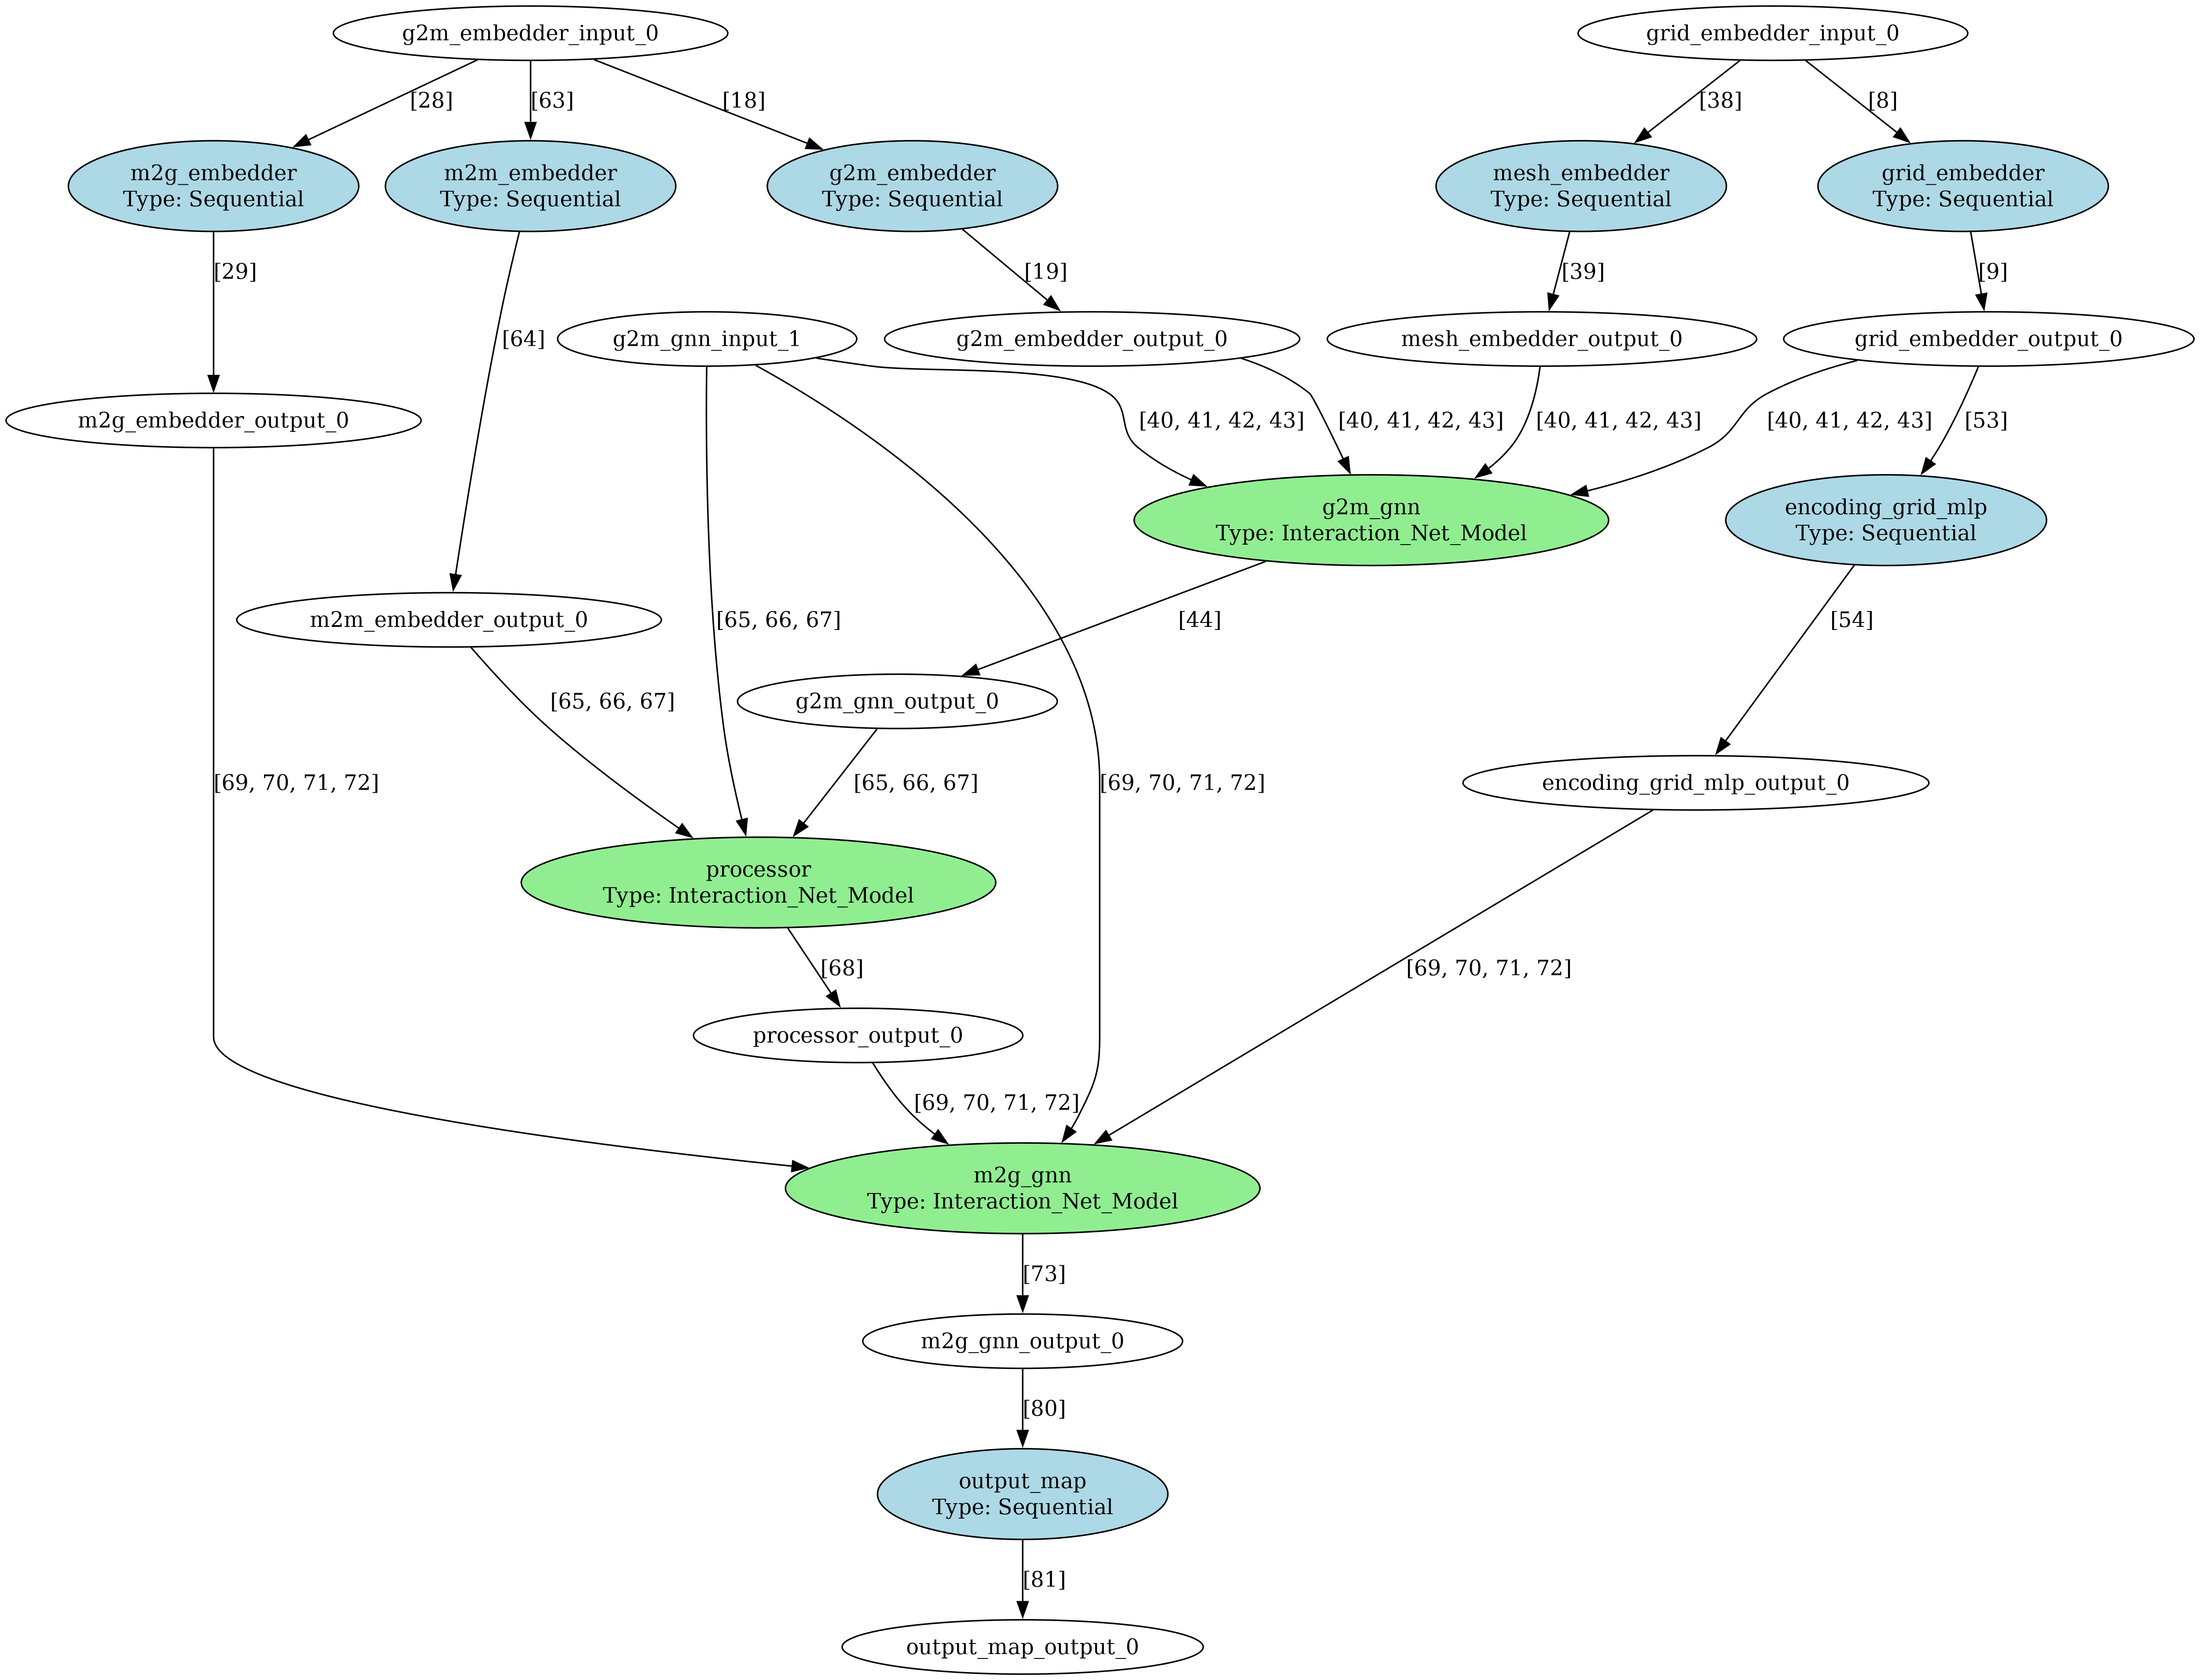

External inputs {'g2m_embedder_input_0': None, 'g2m_gnn_input_1': None, 'grid_embedder_input_0': None}
key g2m_embedder_input_0
key g2m_gnn_input_1
key grid_embedder_input_0
key g2m_gnn_input_1
key g2m_embedder_input_0
key grid_embedder_input_0
name grid_embedder
sub_module_name grid_embedder
input_names ['grid_embedder_input_0']
node features
base_path /home/aw1223/ip/agile/hw/sim/layer_config/


136it [00:00, 58770.38it/s]


Writing memory
name g2m_embedder
sub_module_name g2m_embedder
input_names ['g2m_embedder_input_0']
node features
base_path /home/aw1223/ip/agile/hw/sim/layer_config/


271it [00:00, 64188.86it/s]


name m2g_embedder
sub_module_name m2g_embedder
input_names ['g2m_embedder_input_0']
node features
base_path /home/aw1223/ip/agile/hw/sim/layer_config/


271it [00:00, 58681.28it/s]


name mesh_embedder
sub_module_name mesh_embedder
input_names ['grid_embedder_input_0']
node features
base_path /home/aw1223/ip/agile/hw/sim/layer_config/


136it [00:00, 57548.97it/s]


name m2m_embedder
sub_module_name m2m_embedder
input_names ['g2m_embedder_input_0']
node features
base_path /home/aw1223/ip/agile/hw/sim/layer_config/


271it [00:00, 65931.34it/s]


name encoding_grid_mlp
item_name grid_embedder
item_data {'input_names': ['grid_embedder_input_0'], 'input_indices': [0], 'output_names': ['grid_embedder_output_0'], 'input_order': [8], 'output_order': [9], 'module_type': 'Sequential', 'num_nodes': 1082, 'out_addr': 419584}
Node attribute
item_name g2m_embedder
item_data {'input_names': ['g2m_embedder_input_0'], 'input_indices': [0], 'output_names': ['g2m_embedder_output_0'], 'input_order': [18], 'output_order': [19], 'module_type': 'Sequential', 'num_nodes': 2162, 'out_addr': 834304}
item_name m2g_embedder
item_data {'input_names': ['g2m_embedder_input_0'], 'input_indices': [0], 'output_names': ['m2g_embedder_output_0'], 'input_order': [28], 'output_order': [29], 'module_type': 'Sequential', 'num_nodes': 2162, 'out_addr': 834304}
item_name mesh_embedder
item_data {'input_names': ['grid_embedder_input_0'], 'input_indices': [0], 'output_names': ['mesh_embedder_output_0'], 'input_order': [38], 'output_order': [39], 'module_type': 'Sequen

136it [00:00, 15915.89it/s]

Module type not supported
g2m_gnn
Module type not supported
processor
Module type not supported
m2g_gnn
name output_map
item_name grid_embedder
item_data {'input_names': ['grid_embedder_input_0'], 'input_indices': [0], 'output_names': ['grid_embedder_output_0'], 'input_order': [8], 'output_order': [9], 'module_type': 'Sequential', 'num_nodes': 1082, 'out_addr': 419584}
item_name g2m_embedder
item_data {'input_names': ['g2m_embedder_input_0'], 'input_indices': [0], 'output_names': ['g2m_embedder_output_0'], 'input_order': [18], 'output_order': [19], 'module_type': 'Sequential', 'num_nodes': 2162, 'out_addr': 834304}
item_name m2g_embedder
item_data {'input_names': ['g2m_embedder_input_0'], 'input_indices': [0], 'output_names': ['m2g_embedder_output_0'], 'input_order': [28], 'output_order': [29], 'module_type': 'Sequential', 'num_nodes': 2162, 'out_addr': 834304}
item_name mesh_embedder
item_data {'input_names': ['grid_embedder_input_0'], 'input_indices': [0], 'output_names': ['mesh_embe


/home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set 'set()'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


TypeError: arange() received an invalid combination of arguments - got (int, NoneType), but expected one of:
 * (Number end, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Number end, *, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Number end, Number step, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [9]:
ample = Ample()
# model = GraphLam_Model(<parameters>)
model.to_device('ample',data=inputs)
#inputs.to_device('ample')# Change to this when time

# out = model(<input_graph>)